<a href="https://colab.research.google.com/github/vkatari90/Practical-Data-Analytics-Solutions/blob/main/Project_VenkateshBabu_Aleem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries for dataframe and visualization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


In [ ]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
retail = pd.read_excel('./Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail.shape

(541909, 8)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
retail.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Data Cleaning

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

### Feature Engineering

In [ ]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# This step groups the data in the retail DataFrame by the 'CustomerID' column
# to calculates the sum of the 'Amount' column for each customer.
rfm_m = retail.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# New Attribute : Frequency
# count the number of unique invoice numbers for each customer
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
rfm_f.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [ ]:
rfm_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs

merged_rfm = rfm_m.merge(rfm_f, on='CustomerID')
# another way
# rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
retail.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [ ]:
# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Compute the maximum date to know the last transaction date in our dataset

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# calculate the time difference between the maximum date in the dataset and the transaction date for each record

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
# Compute last transaction date to get the recency of customers
# As each customer may have multiple invonces that has been purshsed
# So we need to create a indicator that tells us when he made the last transaction to find wather he is active or not
rfm_p = retail.groupby('CustomerID')['Diff'].min().reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
merged_rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

merged_rfm = merged_rfm.merge(rfm_p, on='CustomerID')

merged_rfm.rename(columns={'Diff': 'Recency'}, inplace=True)
merged_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Indeed, outliers can significantly skew our dataset and impact the results of our analysis. These outliers typically fall into two categories:

1.  Statistical outliers: These are values that are significantly different from most of the other data points in a dataset and can be identified using statistical methods such as the Z-Score or the IQR method.

2.  Domain-specific outliers: These are values that are unusual or unexpected based on domain-specific knowledge, even if they're not statistically significant outliers. Detecting these outliers generally require a deeper understanding of the specific context or industry.

We'll work on treating these outliers to ensure they don't distort our data analysis process.

In [ ]:
# Create a DataFrame containing the selected attributes
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_rfm[attributes]

# Create a box plot with Plotly
fig = px.box(data, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'},
             title="Outliers Variable Distribution")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',  # Display box plots side by side
    width=800, height=600
)
fig.show()

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = merged_rfm.Amount.quantile(0.05)
Q3 = merged_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Amount >= Q1 - 1.5*IQR) & (merged_rfm.Amount <= Q3 + 1.5*IQR)]


In [ ]:
# Removing (statistical) outliers for Recency
Q1 = merged_rfm.Recency.quantile(0.05)
Q3 = merged_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Recency >= Q1 - 1.5*IQR) & (merged_rfm.Recency <= Q3 + 1.5*IQR)]


In [ ]:
# Removing (statistical) outliers for Frequency
Q1 = merged_rfm.Frequency.quantile(0.05)
Q3 = merged_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
merged_rfm = merged_rfm[(merged_rfm.Frequency >= Q1 - 1.5*IQR) & (merged_rfm.Frequency <= Q3 + 1.5*IQR)]

The purpose of outlier removal is significant for several reasons:

*  Outliers introduce noise and skew results, potentially distorting statistical analyses and models.

*  Eliminating outliers can contribute to a more representative understanding of the dataset and its inherent patterns, thus enhancing the validity of the analysis.

*  This process can also boost the accuracy and reliability of insights drawn from the data.

*  However, outlier removal needs to be performed judiciously. The usage of the 1.5 * IQR range as a common criterion for determining outliers serves as a practical guideline but may not suit every dataset or scenario.

*  It's crucial to consider the context of the data, the specific characteristics of the dataset, and the objectives of the business or analysis.

In a nutshell, the supplied code aids in the removal of statistical outliers for the "Amount," "Recency," and "Frequency" attributes. This step ensures a more clean and representative dataset is used for subsequent analyses and modeling.

In [ ]:
attributes = ['Amount', 'Frequency', 'Recency']

fig = px.box(merged_rfm, y=attributes, title="Outliers Variable Distribution",
             labels={'variable': 'Attributes', 'value': 'Range'},
             boxmode='group', points='outliers')

fig.update_layout(
    xaxis=dict(title="Attributes", title_font=dict(size=14)),
    yaxis=dict(title="Range", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


### Rescaling the Attributes

Rescaling variables to a comparable scale is an essential step in data preprocessing, particularly when modeling algorithms that use distance or gradient calculations. To ensure consistent interpretation and comparison across different features, variables must be on the same scale. Two common methods of achieving this are:

1. Min-Max scaling: This method rescales the data to a fixed range, usually 0 to 1. The formula for this is (x - min) / (max - min).

2. Standardization: Also known as Z-score normalization, this method rescales data to have a mean of 0 and a standard deviation of 1. The formula for this is (x - mean) / standard_deviation.

In this case, we will be using Standardization Scaling because it is less susceptible to outliers and is widely used in machine learning data preprocessing.







In [ ]:
# Rescaling the attributes

merged_rfm = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_rfm)
rfm_df_scaled.shape

(4293, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


### Building the Model

**K-Means Clustering:** K-Means Clustering is one of the most straightforward and commonly used unsupervised machine learning algorithms. Here is how it works:

Initialization: First, we randomly select 'k' points. These points are referred to as 'means' or 'centroids'.

Assignment: Each data point is categorized by assigning it to the nearest mean. The distance between the data point and a mean can be calculated using various methods, the most common being the Euclidean distance.

Update: Once all the points are assigned, the coordinates of the 'means' are updated. This is usually done by calculating the average of all the data points assigned to that mean.

Iteration: Steps 2 and 3 are repeated for a specified number of iterations or until the centroids stop moving significantly.

End: At the end of these iterations, we have our clusters, each represented by their final means.

This repeated assignment and update process allows the algorithm to group data points based on their characteristics, forming distinct clusters. Each cluster consists of data points that are more similar to each other than those in other clusters.







In [ ]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 3, 1, ..., 0, 1, 1], dtype=int32)

Determining the optimal number of clusters is indeed a critical step in any unsupervised algorithm. The Elbow Method is one of the most common techniques used to find this optimal value of 'k' (number of clusters).

In the Elbow Method, we plot the explained variation as a function of the number of clusters. The explained variation measures the extent to which a mathematical model accounts for the variation (dispersion) of a given data set.

When this is plotted, the "elbow" point on the curve is considered as the optimal number of clusters. This "elbow" point typically represents where increasing the number of clusters does not result in significant better modeling of the data or "explained variation".


In [ ]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd,
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

For n_clusters=2, the Elbow score is 7661.701161911676
For n_clusters=3, the Elbow score is 4433.58061930212
For n_clusters=4, the Elbow score is 3360.3763202151954
For n_clusters=5, the Elbow score is 2803.033248739617
For n_clusters=6, the Elbow score is 2392.1886075167304
For n_clusters=7, the Elbow score is 2039.2893421015087
For n_clusters=8, the Elbow score is 1825.0778361171747


In [ ]:
ssd

[7661.701161911676,
 4433.58061930212,
 3360.3763202151954,
 2803.033248739617,
 2392.1886075167304,
 2039.2893421015087,
 1825.0778361171747]

### Silhouette Analysis

The silhouette score calculation is a measure of how similar an object is to its own cluster compared to other clusters. The formula, silhouette score = p - q / max(p, q), is constituted by:

**'p':** This is the mean distance to the points in the nearest cluster that the data point is not a part of. It is a measure of how closely the object is related to the elements in its neighbouring cluster.

**'q':** This is the mean intra-cluster distance to all the points in its own cluster. It signifies how aptly the object fits within its existing cluster.

The silhouette score ranges from -1 to 1.

A score closer to 1 indicates that the data point has good similarity to its own cluster and poor similarity with neighbouring clusters.

A score closer to -1 reveals low similarity with its own cluster and high similarity with the neighbouring clusters, indicating inappropriate assignment.

##### Purpose of Silhouette Analysis:

* Silhouette Analysis is performed to evaluate the quality of clusters. It provides a graphical representation of how well each object lies within its cluster. This measure has a range of -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.

* By looking at the silhouette scores of different cluster numbers, we can determine the most suitable or optimal number of clusters for the dataset at hand.

* To sum it up, the given code performs silhouette analysis for varying numbers of clusters for the standardized RFM data using the K-Means clustering technique. It helps identify the number of clusters which offers the best quality of clustering for your dataset.

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48251080449999506
For n_clusters=5, the silhouette score is 0.46627005641897035
For n_clusters=6, the silhouette score is 0.41766919745832853
For n_clusters=7, the silhouette score is 0.41493333476205857
For n_clusters=8, the silhouette score is 0.40790220534014515


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
# assign the label
merged_rfm['Cluster_Id'] = kmeans.labels_
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id
0,0.00,2,325,2
1,4310.00,182,1,1
2,1797.24,31,74,0
3,1757.55,73,18,0
4,334.40,17,309,2


In [ ]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Amount',
             title="Cluster Id vs Amount Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster_Id')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [ ]:
fig = px.scatter(merged_rfm, x='Cluster_Id', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster_Id': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)

fig.show()

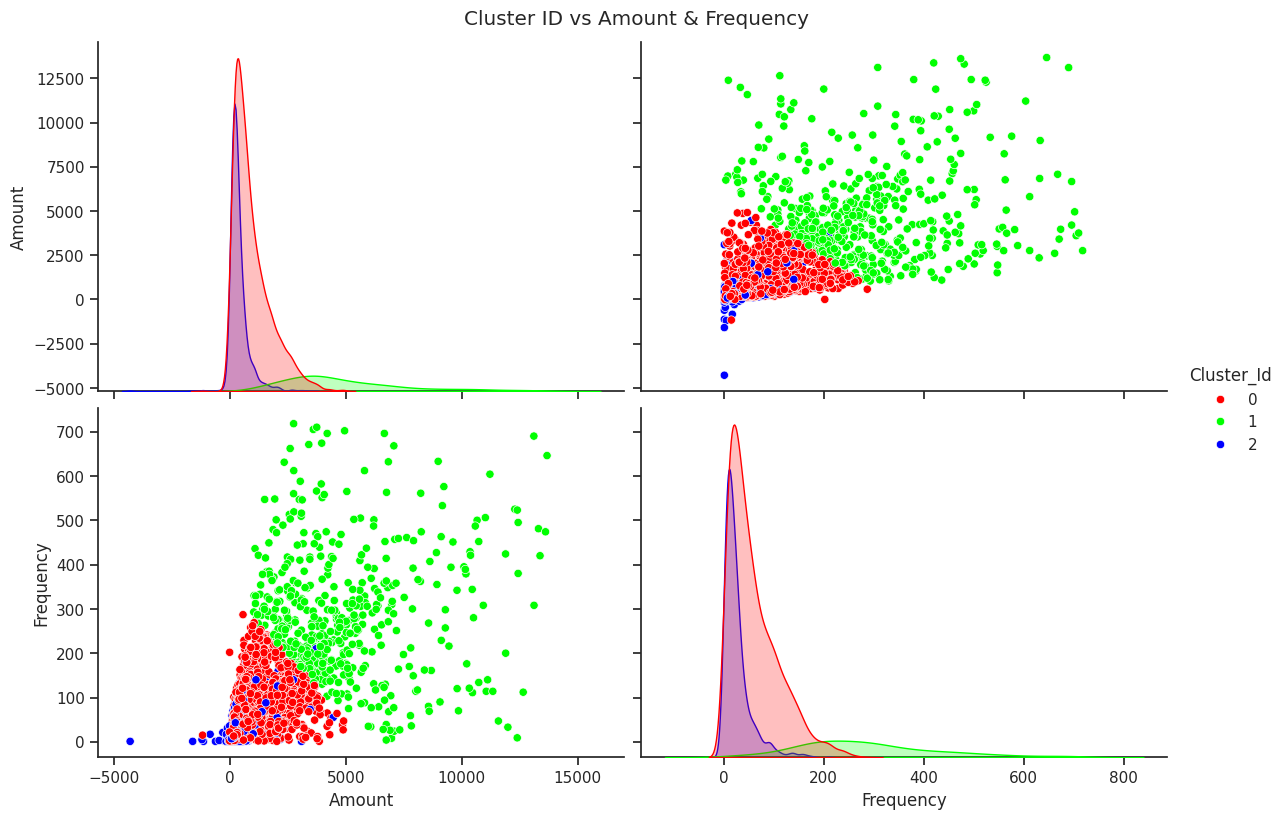

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

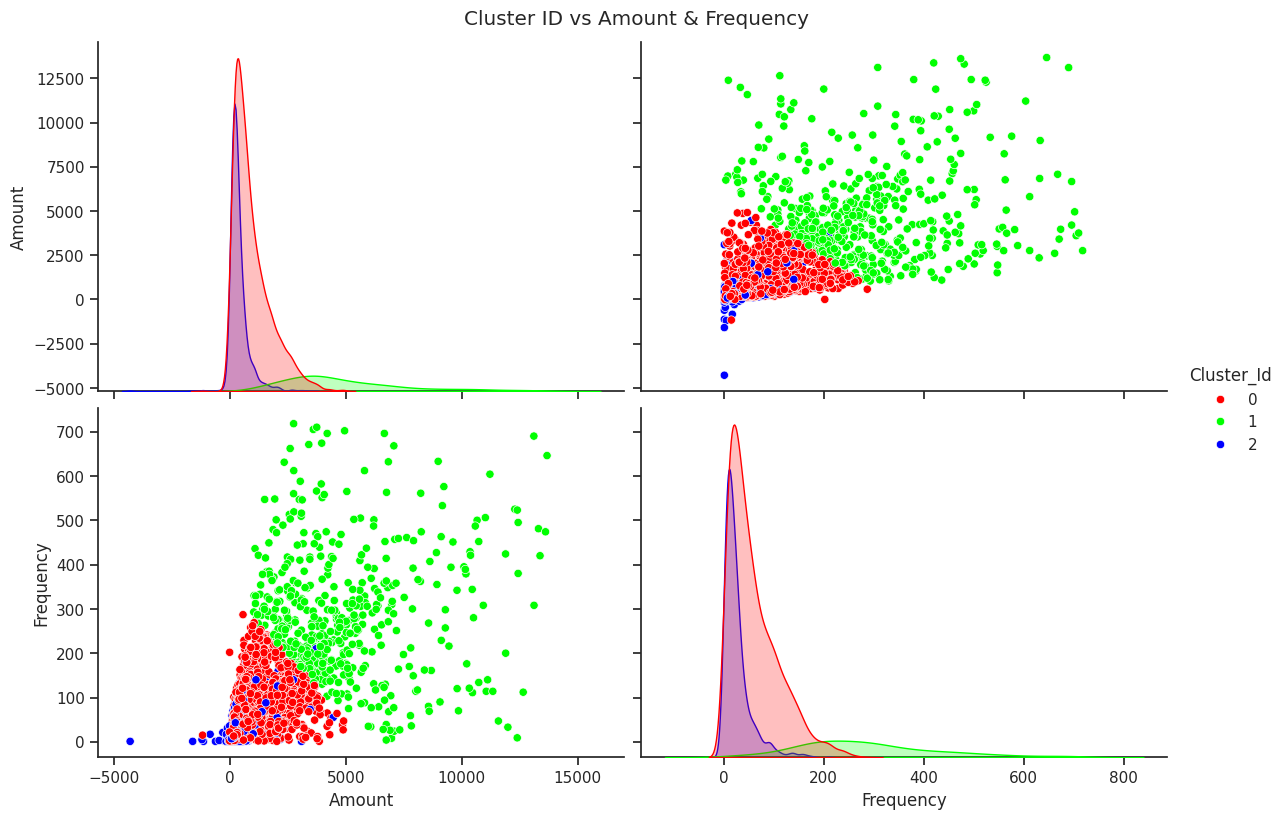

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

In [ ]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Frequency',
             title="Cluster Id vs Frequency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

### Box plot to visualize Cluster Id vs Recency

In [ ]:
fig = px.box(merged_rfm, x='Cluster_Id', y='Recency',
             title="Cluster Id vs Recency Box Plot",
             labels={'Cluster_Id': 'Cluster ID', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [ ]:
# Selecting the two features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency']]

# Specify the number of clusters (e.g., 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_2D'] = kmeans.fit_predict(data_for_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(merged_rfm, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()

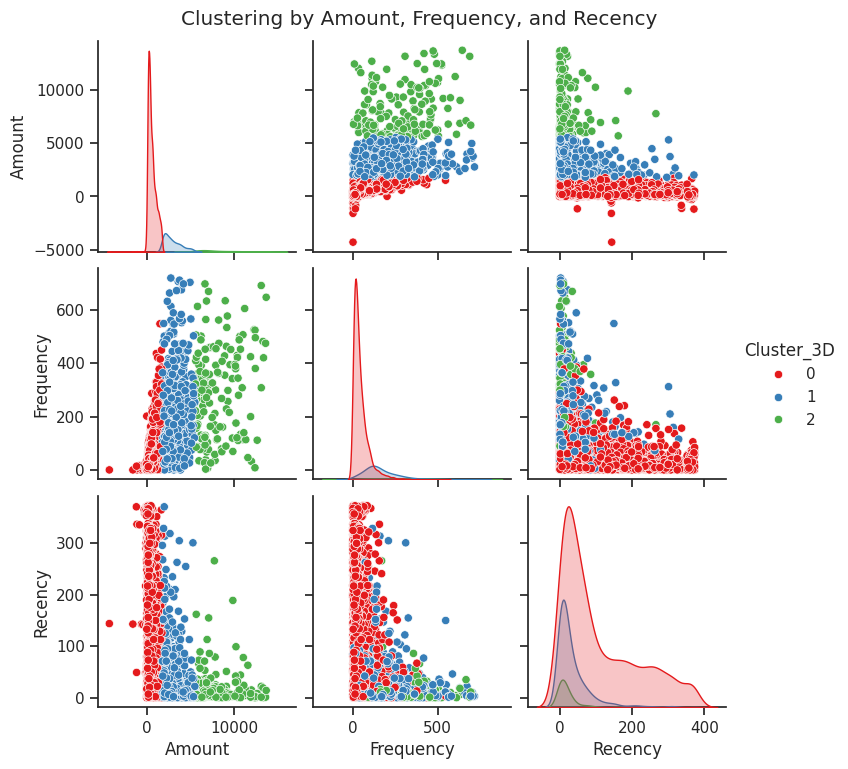

In [ ]:
# Selecting the three features for clustering
data_for_clustering = merged_rfm[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_rfm, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()

In [ ]:
import plotly.express as px

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

### Hierarchical Clustering

Hierarchical Clustering is a type of clustering method commonly used in data analysis. Its primary characteristic is the creation of a hierarchy or tree-like structure of clusters, representing data similarities at different levels. For example, in computing, the directory structure uses hierarchical clustering where folders are clusters of files and sub-folders. There are two major types of hierarchical clustering:

1. Divisive: In this approach, one starts with all the data points in a single large cluster. The cluster is then divided iteratively into smaller clusters until each data point forms a cluster on its own.

2. Agglomerative: This approach works in the opposite direction. You start with each data point in its own cluster and then combine clusters iteratively until only one large cluster remains.

##### Single Linkage:

In Single Linkage Hierarchical Clustering, the distance between two clusters is the smallest distance between any point in each cluster.







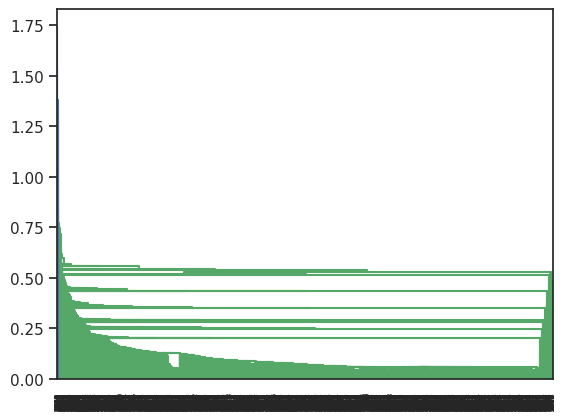

In [ ]:
# Single linkage:

import sys
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# Increase recursion limit
sys.setrecursionlimit(10000)

# Perform hierarchical clustering

# Plot the dendrogram
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

##### Complete Linkage

Complete Linkage Hierarchical Clustering considers the distance between two clusters to be the maximum distance between any data point in each cluster. Hence, the separation between clusters "r" and "s" would be represented by the longest distance between points in these two clusters.

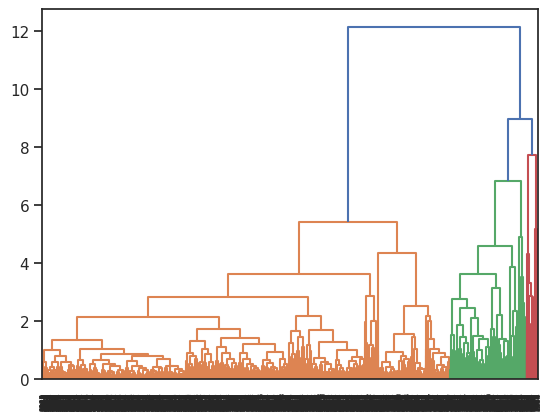

In [ ]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

##### Average Linkage:
In Average Linkage Hierarchical Clustering, the distance between two clusters is the average of all distances between points in the two clusters.

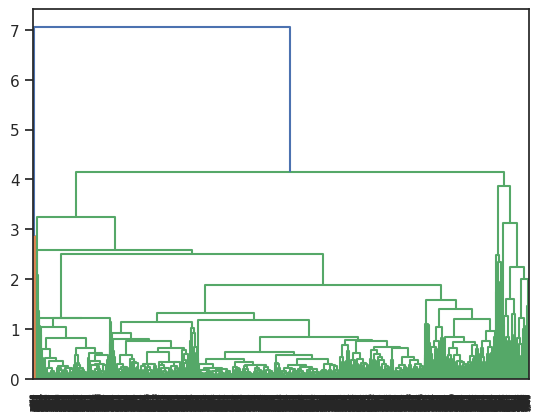

In [ ]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting the Dendrogram based on K essentially deciding on the number of clusters ('K') we want. This is done by cutting the dendrogram tree at a height where it will result in 'K' clusters.

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Assign cluster labels

merged_rfm['Cluster_Labels'] = cluster_labels
merged_rfm.head()

,Amount,Frequency,Recency,Cluster_Id,Cluster_2D,Cluster_3D,Cluster_Labels
0,0.00,2,325,2,0,0,0
1,4310.00,182,1,1,2,2,0
2,1797.24,31,74,0,2,2,0
3,1757.55,73,18,0,2,2,0
4,334.40,17,309,2,0,0,0


In [ ]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Amount',
             title="Cluster Labels vs Amount Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Amount': 'Amount'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()


In [ ]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Frequency',
             title="Cluster Labels vs Frequency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [ ]:
fig = px.box(merged_rfm, x='Cluster_Labels', y='Recency',
             title="Cluster Labels vs Recency Box Plot",
             labels={'Cluster_Labels': 'Cluster Labels', 'Recency': 'Recency'})

fig.update_layout(
    xaxis=dict(title="Cluster Labels", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

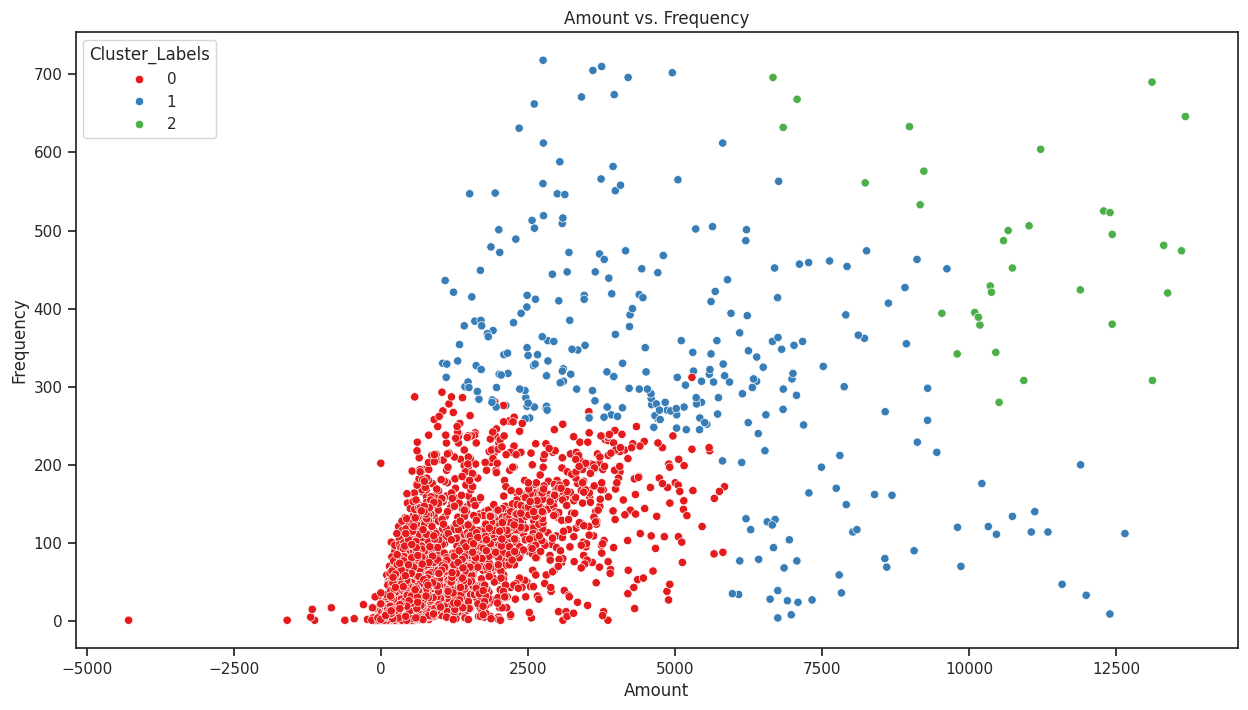

In [ ]:
# Pairwise scatter plots for clustering (2D)
plt.figure(figsize=(15, 8))  # Adjust the figure size here

# Amount vs. Frequency
sns.scatterplot(x='Amount', y='Frequency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Frequency');

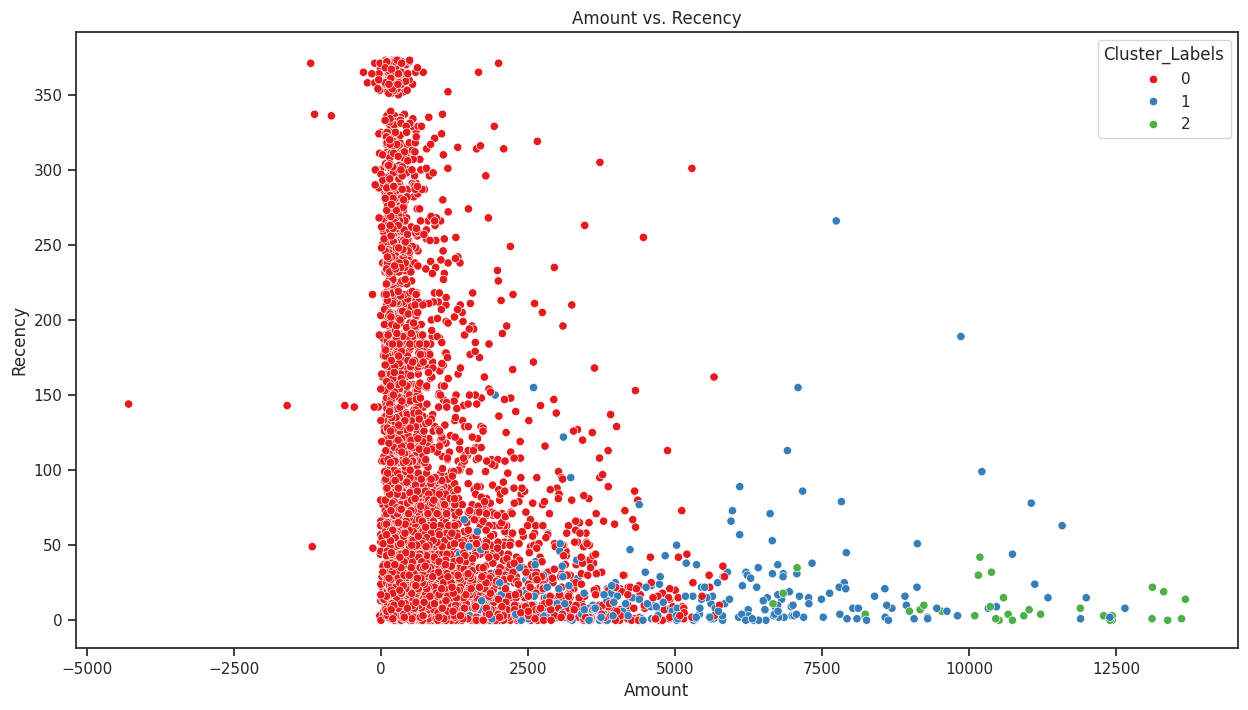

In [ ]:
plt.figure(figsize=(15, 8))  # Adjust the figure size here

sns.scatterplot(x='Amount', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Amount vs. Recency');

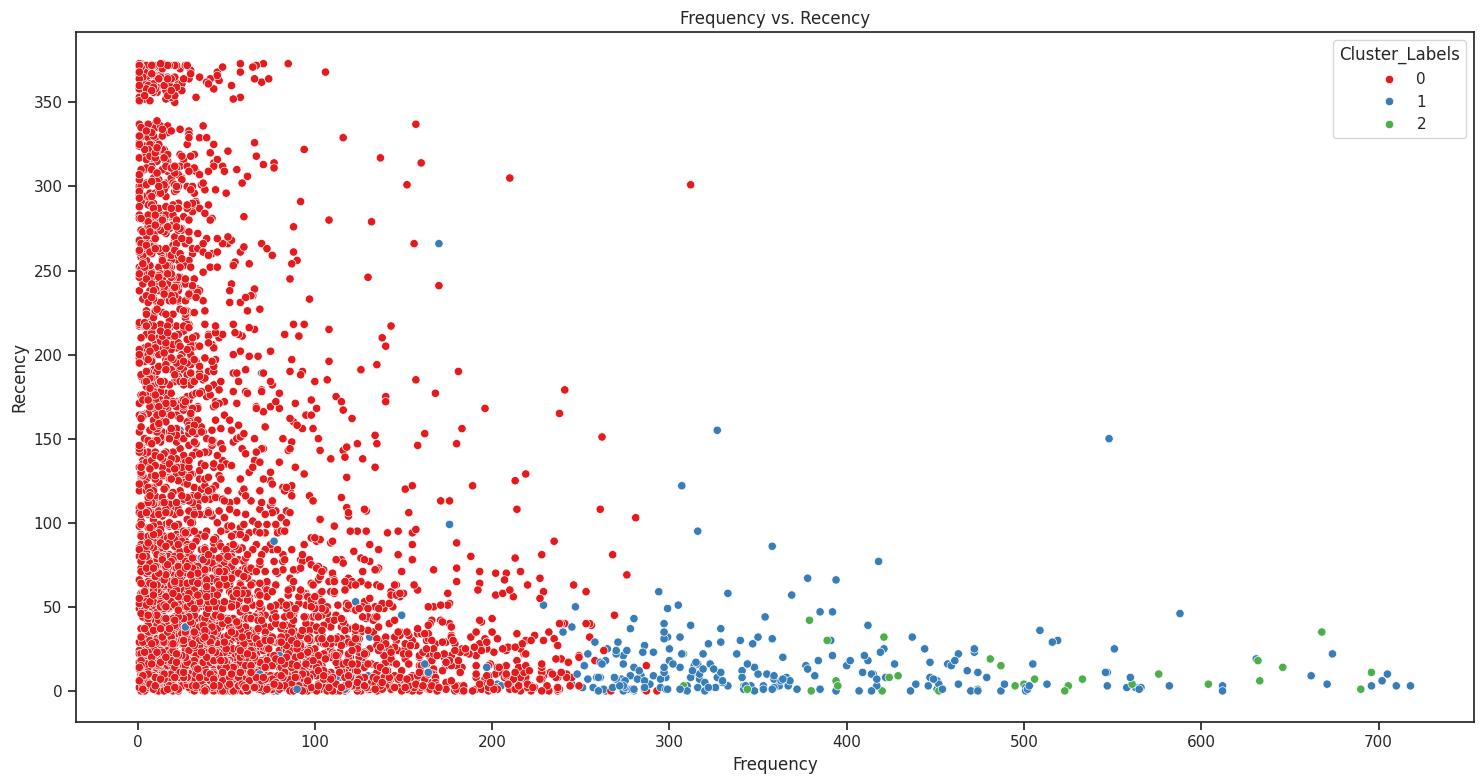

In [ ]:
# Frequency vs. Recency
plt.figure(figsize=(15, 8))  # Adjust the figure size here
sns.scatterplot(x='Frequency', y='Recency', hue='Cluster_Labels', data=merged_rfm, palette='Set1')
plt.title('Frequency vs. Recency')

plt.tight_layout()
plt.show()

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_rfm['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(merged_rfm, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

### Analytical results

**In K-Means Clustering with 3 Clusters:**

* Customers in Cluster 1 have the highest transaction amounts compared to other groups, making them the high-value customers.
* Customers in Cluster 1 also purchase more frequently, indicating a consistent engagement with the business.
* Conversely, customers under Cluster 2 have not made recent purchases, thus they are of least priority from a business standpoint.

In Hierarchical Clustering with 3 Cluster Labels: **bold text**

* Customers with Cluster_Labels 2 exhibit high transaction amounts, positioning them as high-value customers.
* These customers, under Cluster_Labels 2, also show higher purchase frequency, suggesting stable business interaction.
* However, those in Cluster_Labels 0 group have been inactive with recent purchases, which signifies lower business importance for now.